#**Step 01: Install the dependencies**

In [1]:
!nvidia-smi

Sat Aug 10 14:50:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install --upgrade ultralytics
!pip install -q supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

#**Step 02: Mount GitHub to load processed data and save results**

In [3]:
!git clone https://github.com/ajivishwam/ISL-Detection.git

Cloning into 'ISL-Detection'...
remote: Enumerating objects: 17358, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 17358 (delta 2), reused 24 (delta 2), pack-reused 17333
Receiving objects: 100% (17358/17358), 493.07 MiB | 27.66 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (71675/71675), done.


#**Step 03: Clone the YOLOv10 Github from official Repository**

In [4]:
!git clone https://github.com/THU-MIG/yolov10.git
%cd yolov10

Cloning into 'yolov10'...
remote: Enumerating objects: 20329, done.
remote: Counting objects: 100% (1527/1527), done.
remote: Compressing objects: 100% (176/176), done.
remote: Total 20329 (delta 1450), reused 1363 (delta 1351), pack-reused 18802
Receiving objects: 100% (20329/20329), 11.19 MiB | 7.27 MiB/s, done.
Resolving deltas: 100% (14326/14326), done.
/content/yolov10


#**Step 04: Install All the Required Packages**

In [5]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.4/128.4 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62

In [1]:
%cd yolov10

/content/yolov10


#**Step 05: Download the Pretrained Model Weights**

In [2]:
import os
import urllib.request
#Create a directory for the weights in the current working directory
weights_dir = os.path.join(os.getcwd(), 'weights')
os.makedirs(weights_dir, exist_ok = True)
#urls of the weights file
urls = ["https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt"]

#Download each file
for url in urls:
  filename = os.path.basename(url)
  filepath = os.path.join(weights_dir, filename)
  urllib.request.urlretrieve(url, filepath)
  print(f"Downloaded: {filepath}")

Downloaded: /content/yolov10/weights/yolov10n.pt
Downloaded: /content/yolov10/weights/yolov10s.pt
Downloaded: /content/yolov10/weights/yolov10m.pt
Downloaded: /content/yolov10/weights/yolov10b.pt
Downloaded: /content/yolov10/weights/yolov10l.pt
Downloaded: /content/yolov10/weights/yolov10x.pt


In [3]:
%cd yolov10

[Errno 2] No such file or directory: 'yolov10'
/content/yolov10


#**Step 06: Train Custom Model**

In [ ]:
!yolo task=detect mode=train epochs=8 batch=8 plots=True imgsz=240 model='weights/yolov10m.pt' data='/content/drive/MyDrive/Colab Notebooks/Thesis-code/Data_20/data.yaml' \
lr0=0.001 optimizer=AdamW \
hsv_h=0.015 hsv_s=0.7 hsv_v=0.4 \
degrees=5.0 translate=0.1 scale=0.5 shear=2.0 mosaic=1.0 mixup=0.2 \
patience=10 warmup_epochs=5.0 cos_lr=True amp=True \
save_period=1


100% 32.1M/32.1M [00:00<00:00, 98.0MB/s]
New https://pypi.org/project/ultralytics/8.2.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.67 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=weights/yolov10m.pt, data=/content/drive/MyDrive/Colab Notebooks/Thesis-code/Data_20/data.yaml, epochs=8, time=None, patience=10, batch=8, imgsz=240, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=Fals

In [3]:
!yolo task=detect mode=train epochs=25 batch=8 plots=True imgsz=256 model='weights/yolov10m.pt' data='/content/ISL-Detection/Data_20/data.yaml' \
lr0=0.001 optimizer=AdamW \
hsv_h=0.015 hsv_s=0.7 hsv_v=0.4 \
degrees=5.0 translate=0.1 scale=0.5 shear=2.0 mosaic=1.0 mixup=0.2 \
patience=0 warmup_epochs=5.0 cos_lr=True amp=True \
save_period=1


Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=weights/yolov10m.pt, data=/content/ISL-Detection/Data_20/data.yaml, epochs=25, time=None, patience=0, batch=8, imgsz=256, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

##**Step 07: Save the Model best.pt weight to Drive or Download the file**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import shutil
# Path where YOLOv10 saves the training results by default
default_save_path = '/content/yolov10/runs'

# Destination path in your Google Drive
destination_path = '/content/drive/MyDrive/Colab Notebooks/Thesis-code/Results/yolov10/yolov10-latest'

# Copy the entire directory
shutil.copytree(default_save_path, destination_path)

'/content/drive/MyDrive/Colab Notebooks/Thesis-code/Results/yolov10/yolov10-latest'

In [5]:
import shutil

# Create a zip file
shutil.make_archive('results', 'zip', '/content/yolov10/runs')
# Download the zip file
from google.colab import files
files.download('/content/yolov10/results.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**Step 08: Examine Training Results**

In [6]:
results_dir = '/content/yolov10/runs/detect/train'

In [13]:
results_dir = '/content/drive/MyDrive/Colab Notebooks/Thesis-code/Results/yolov10/model-run-25/detect/train2'

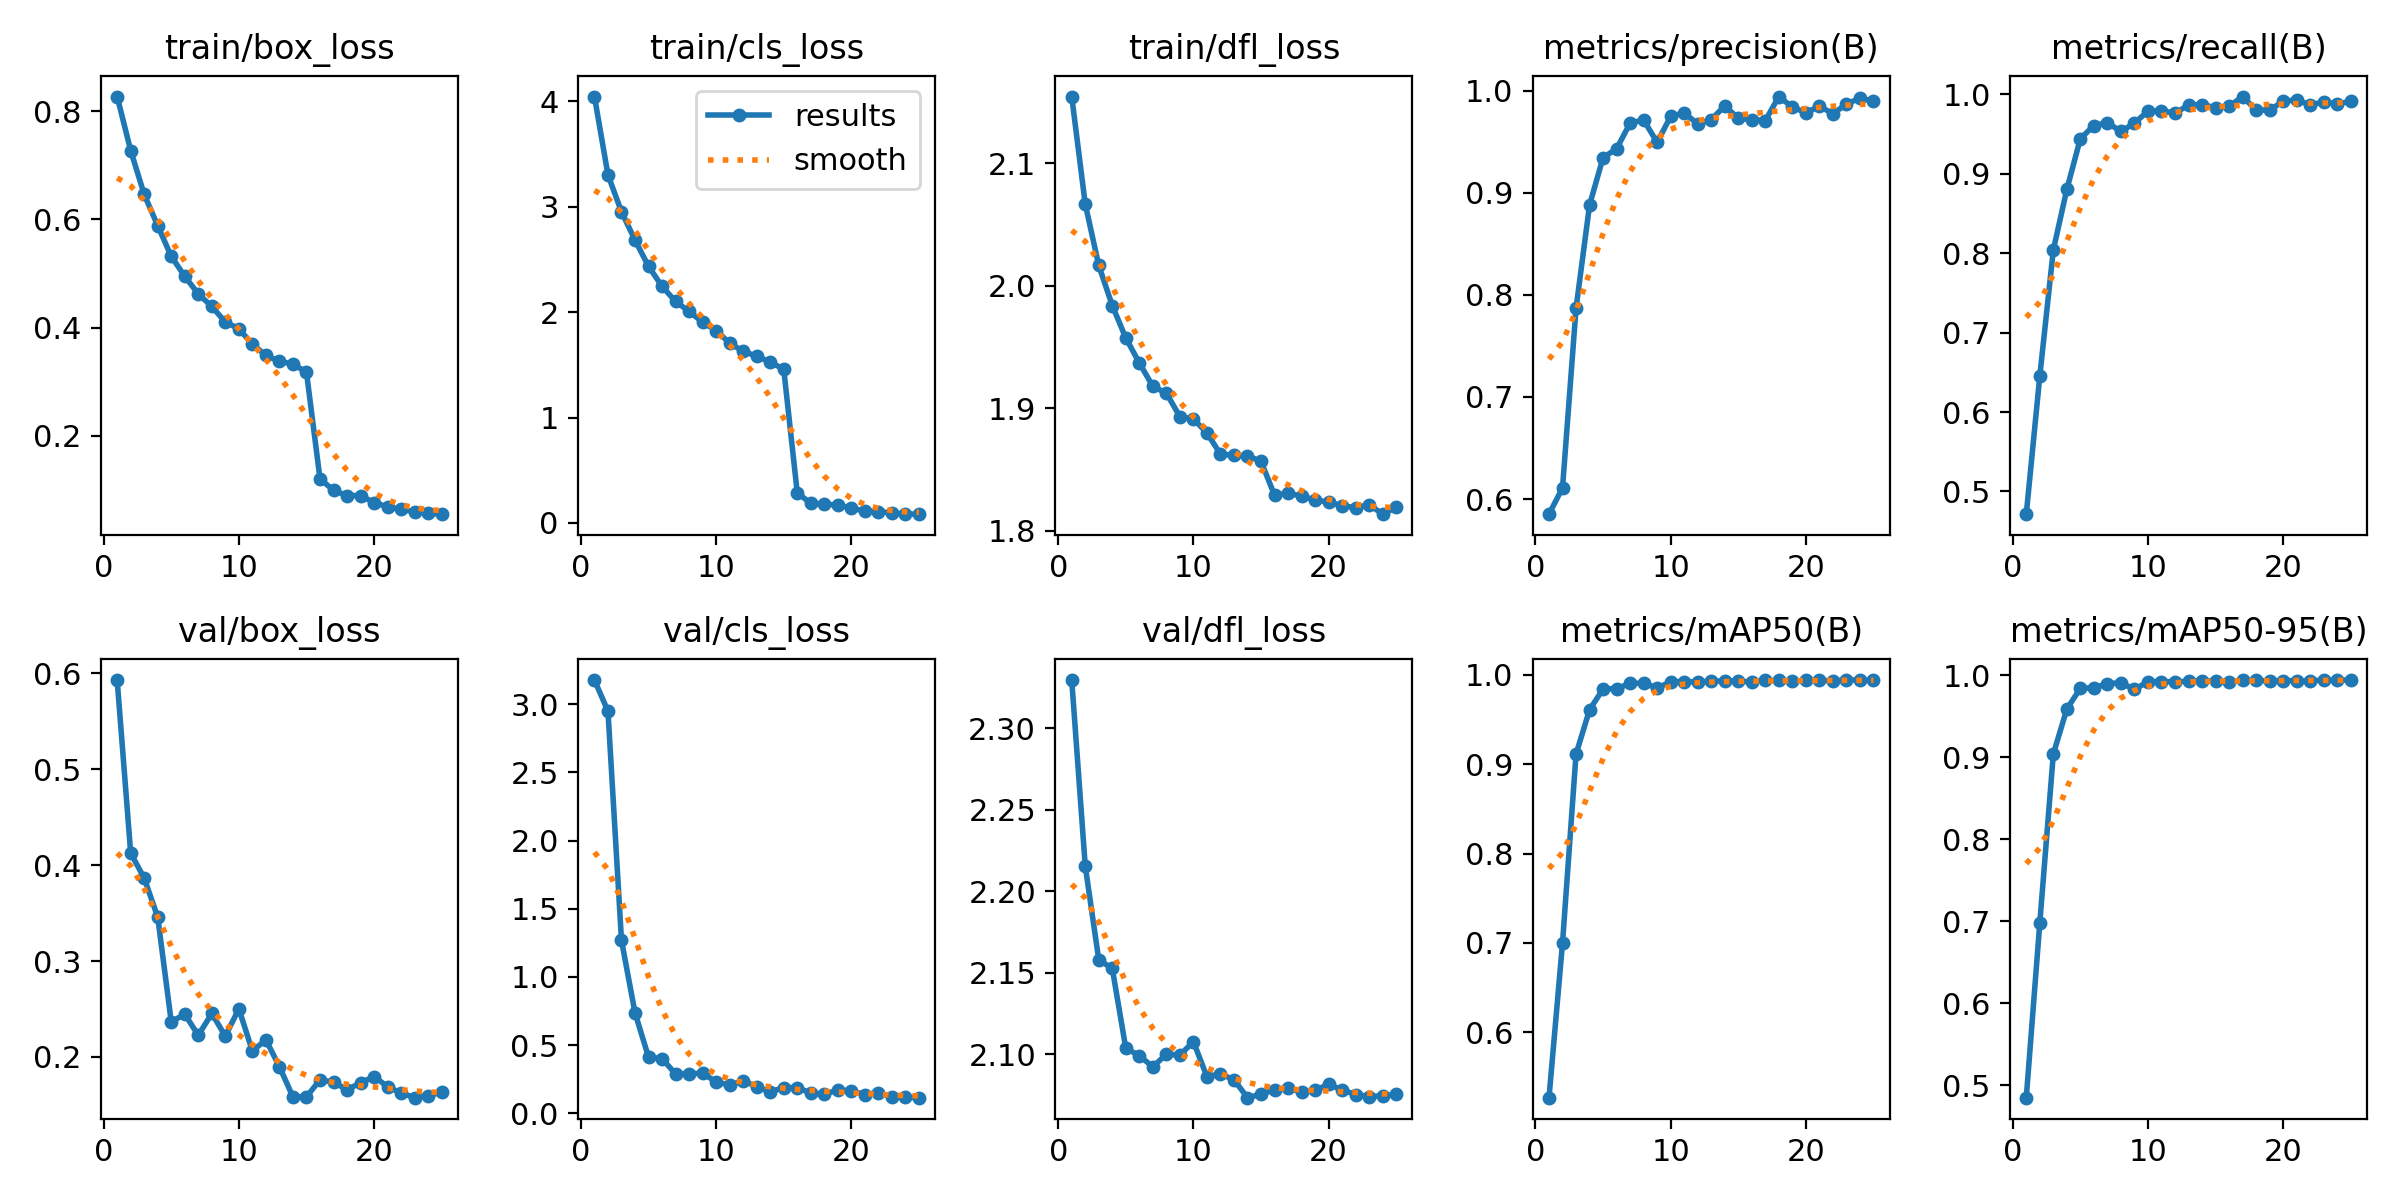

In [7]:
from IPython.display import Image

Image(f"{results_dir}/results.png")

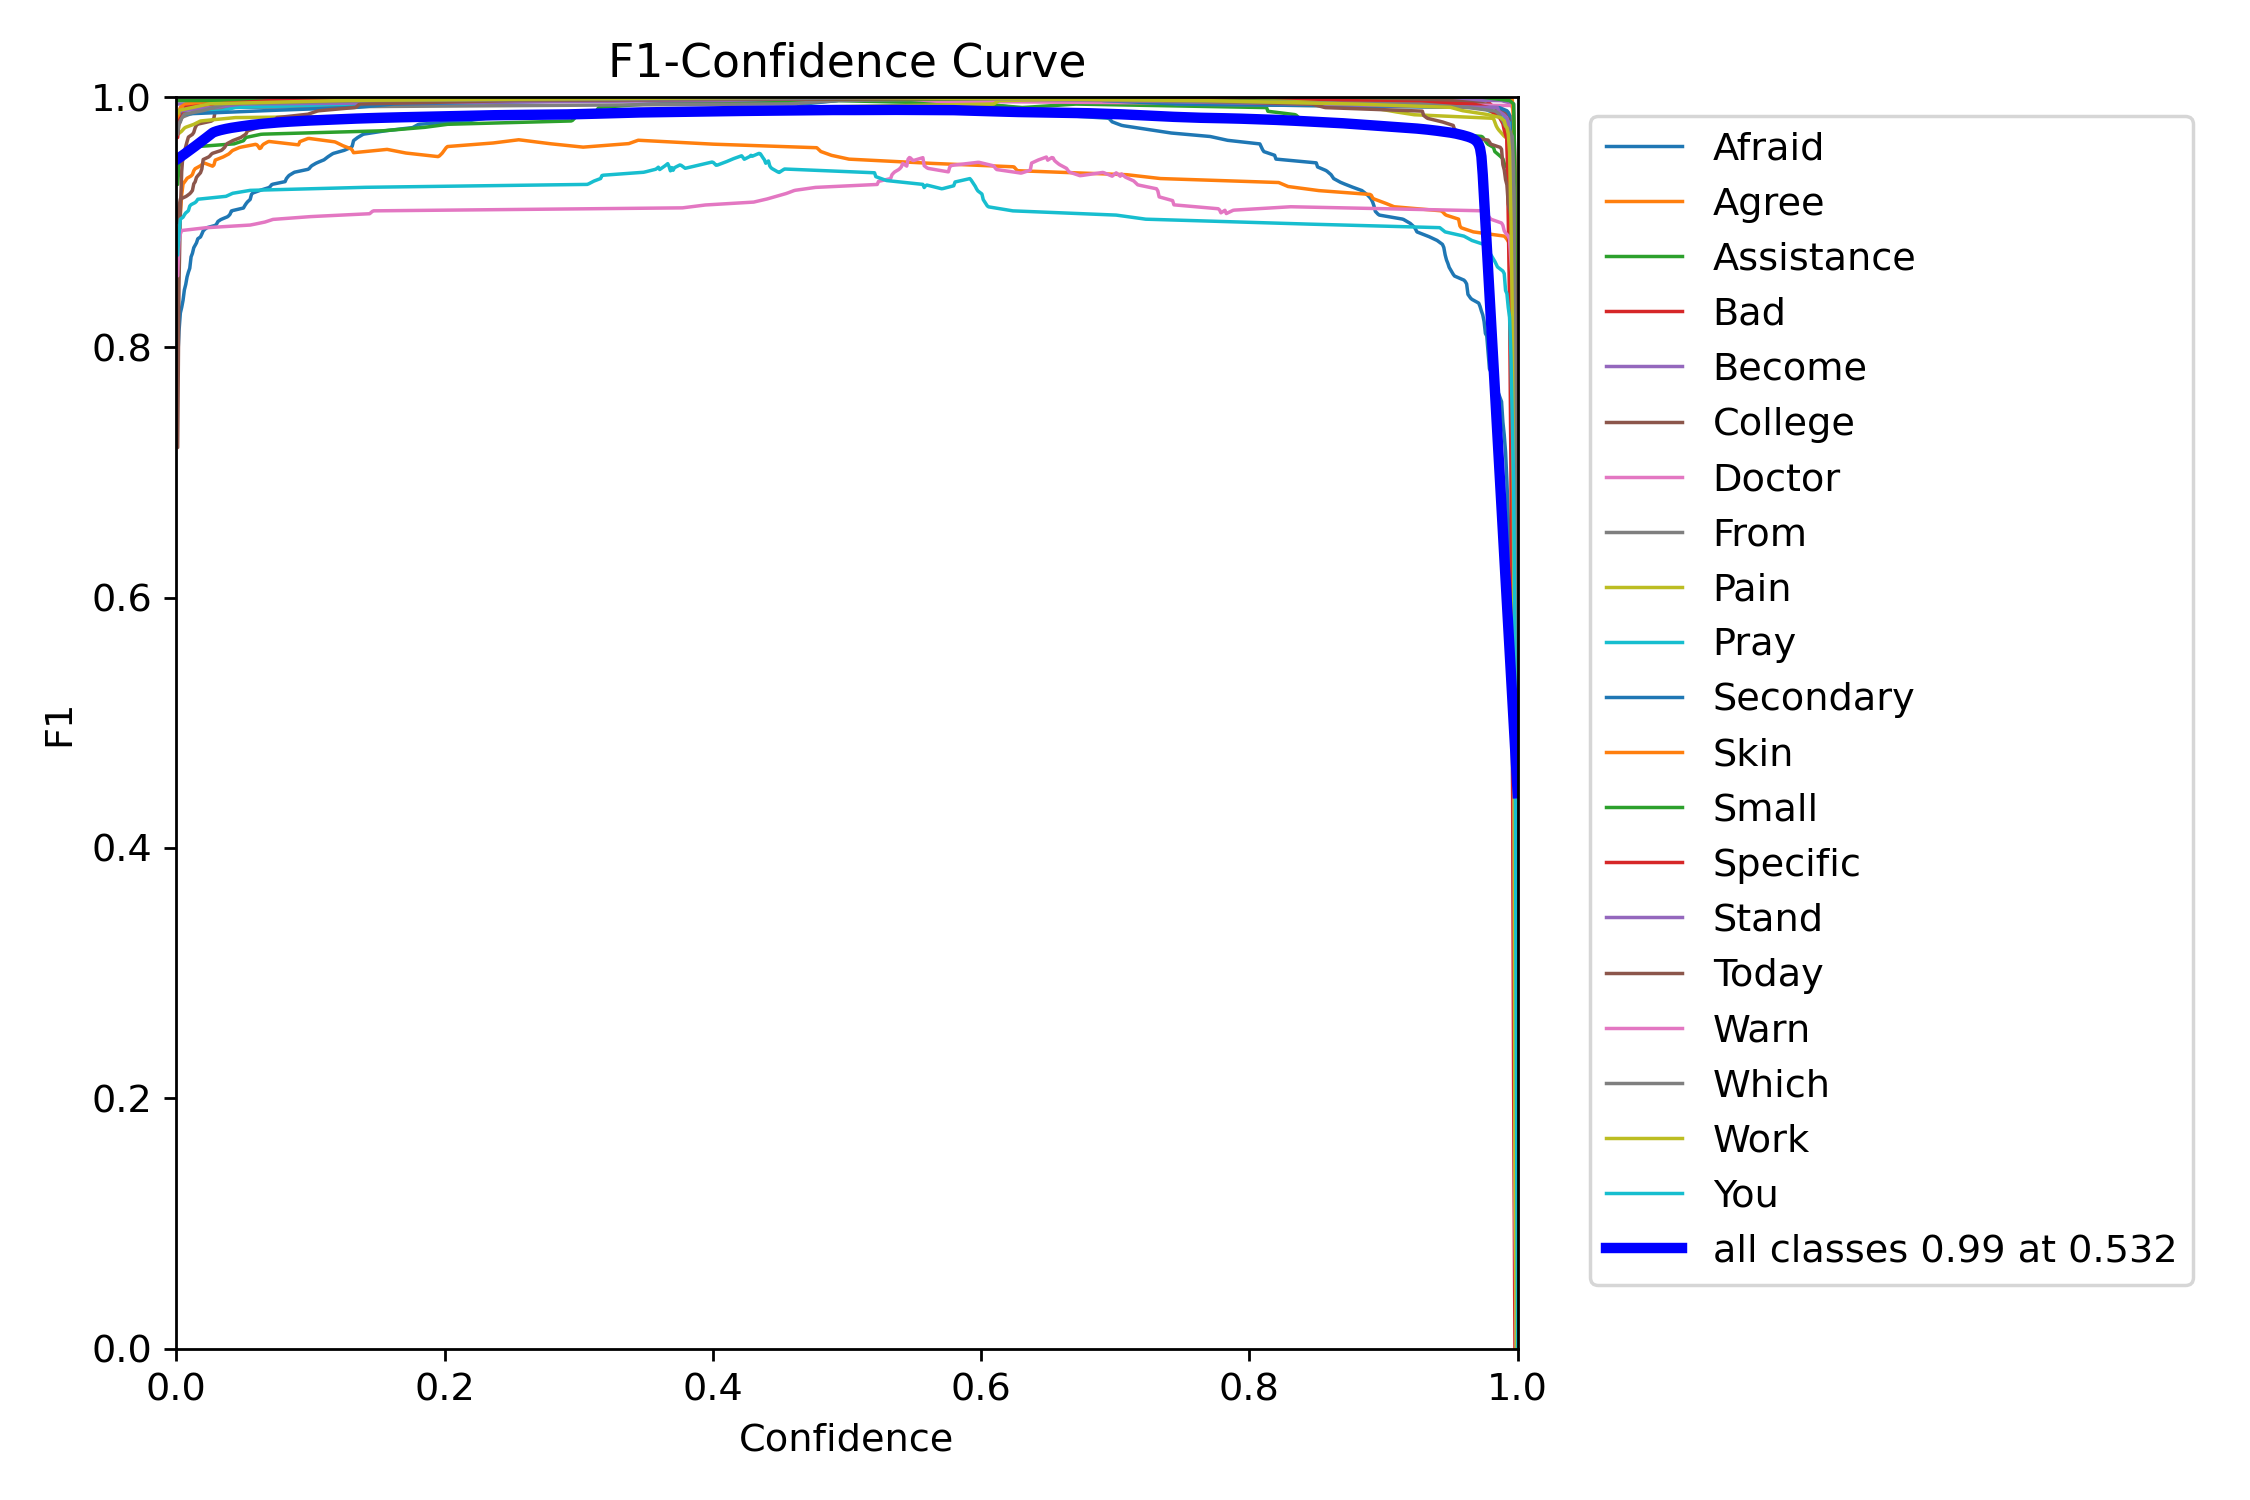

In [8]:
Image(f"{results_dir}/F1_curve.png")

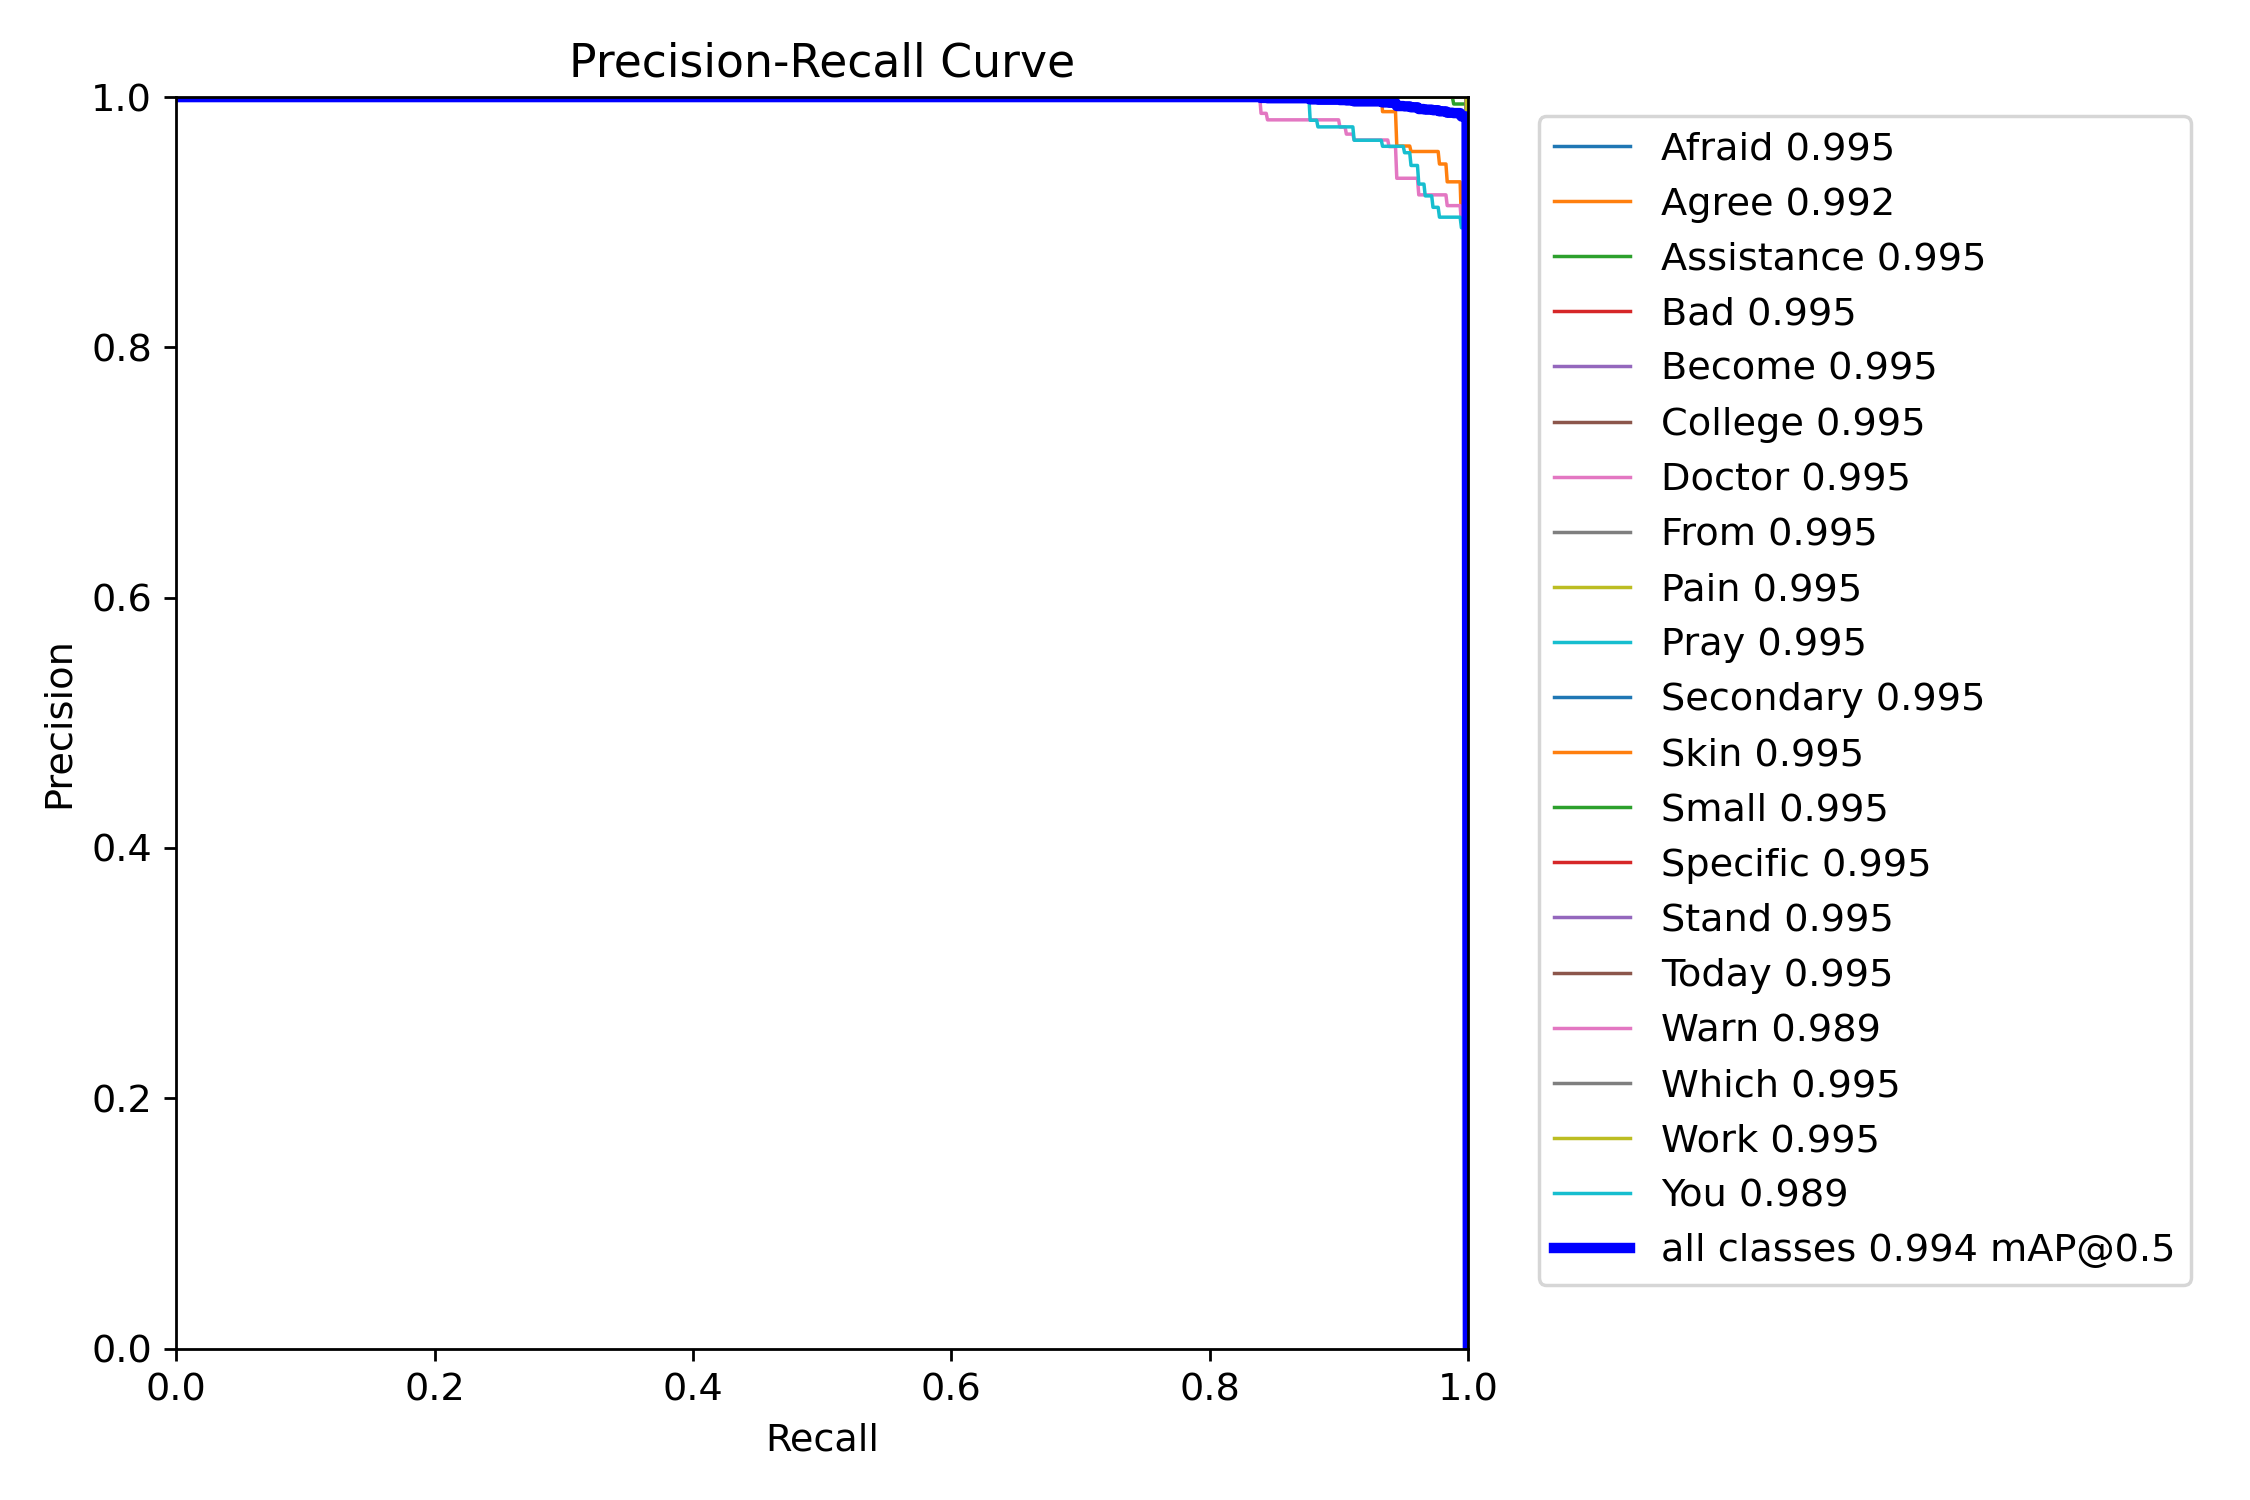

In [9]:
Image(f"{results_dir}/PR_curve.png")

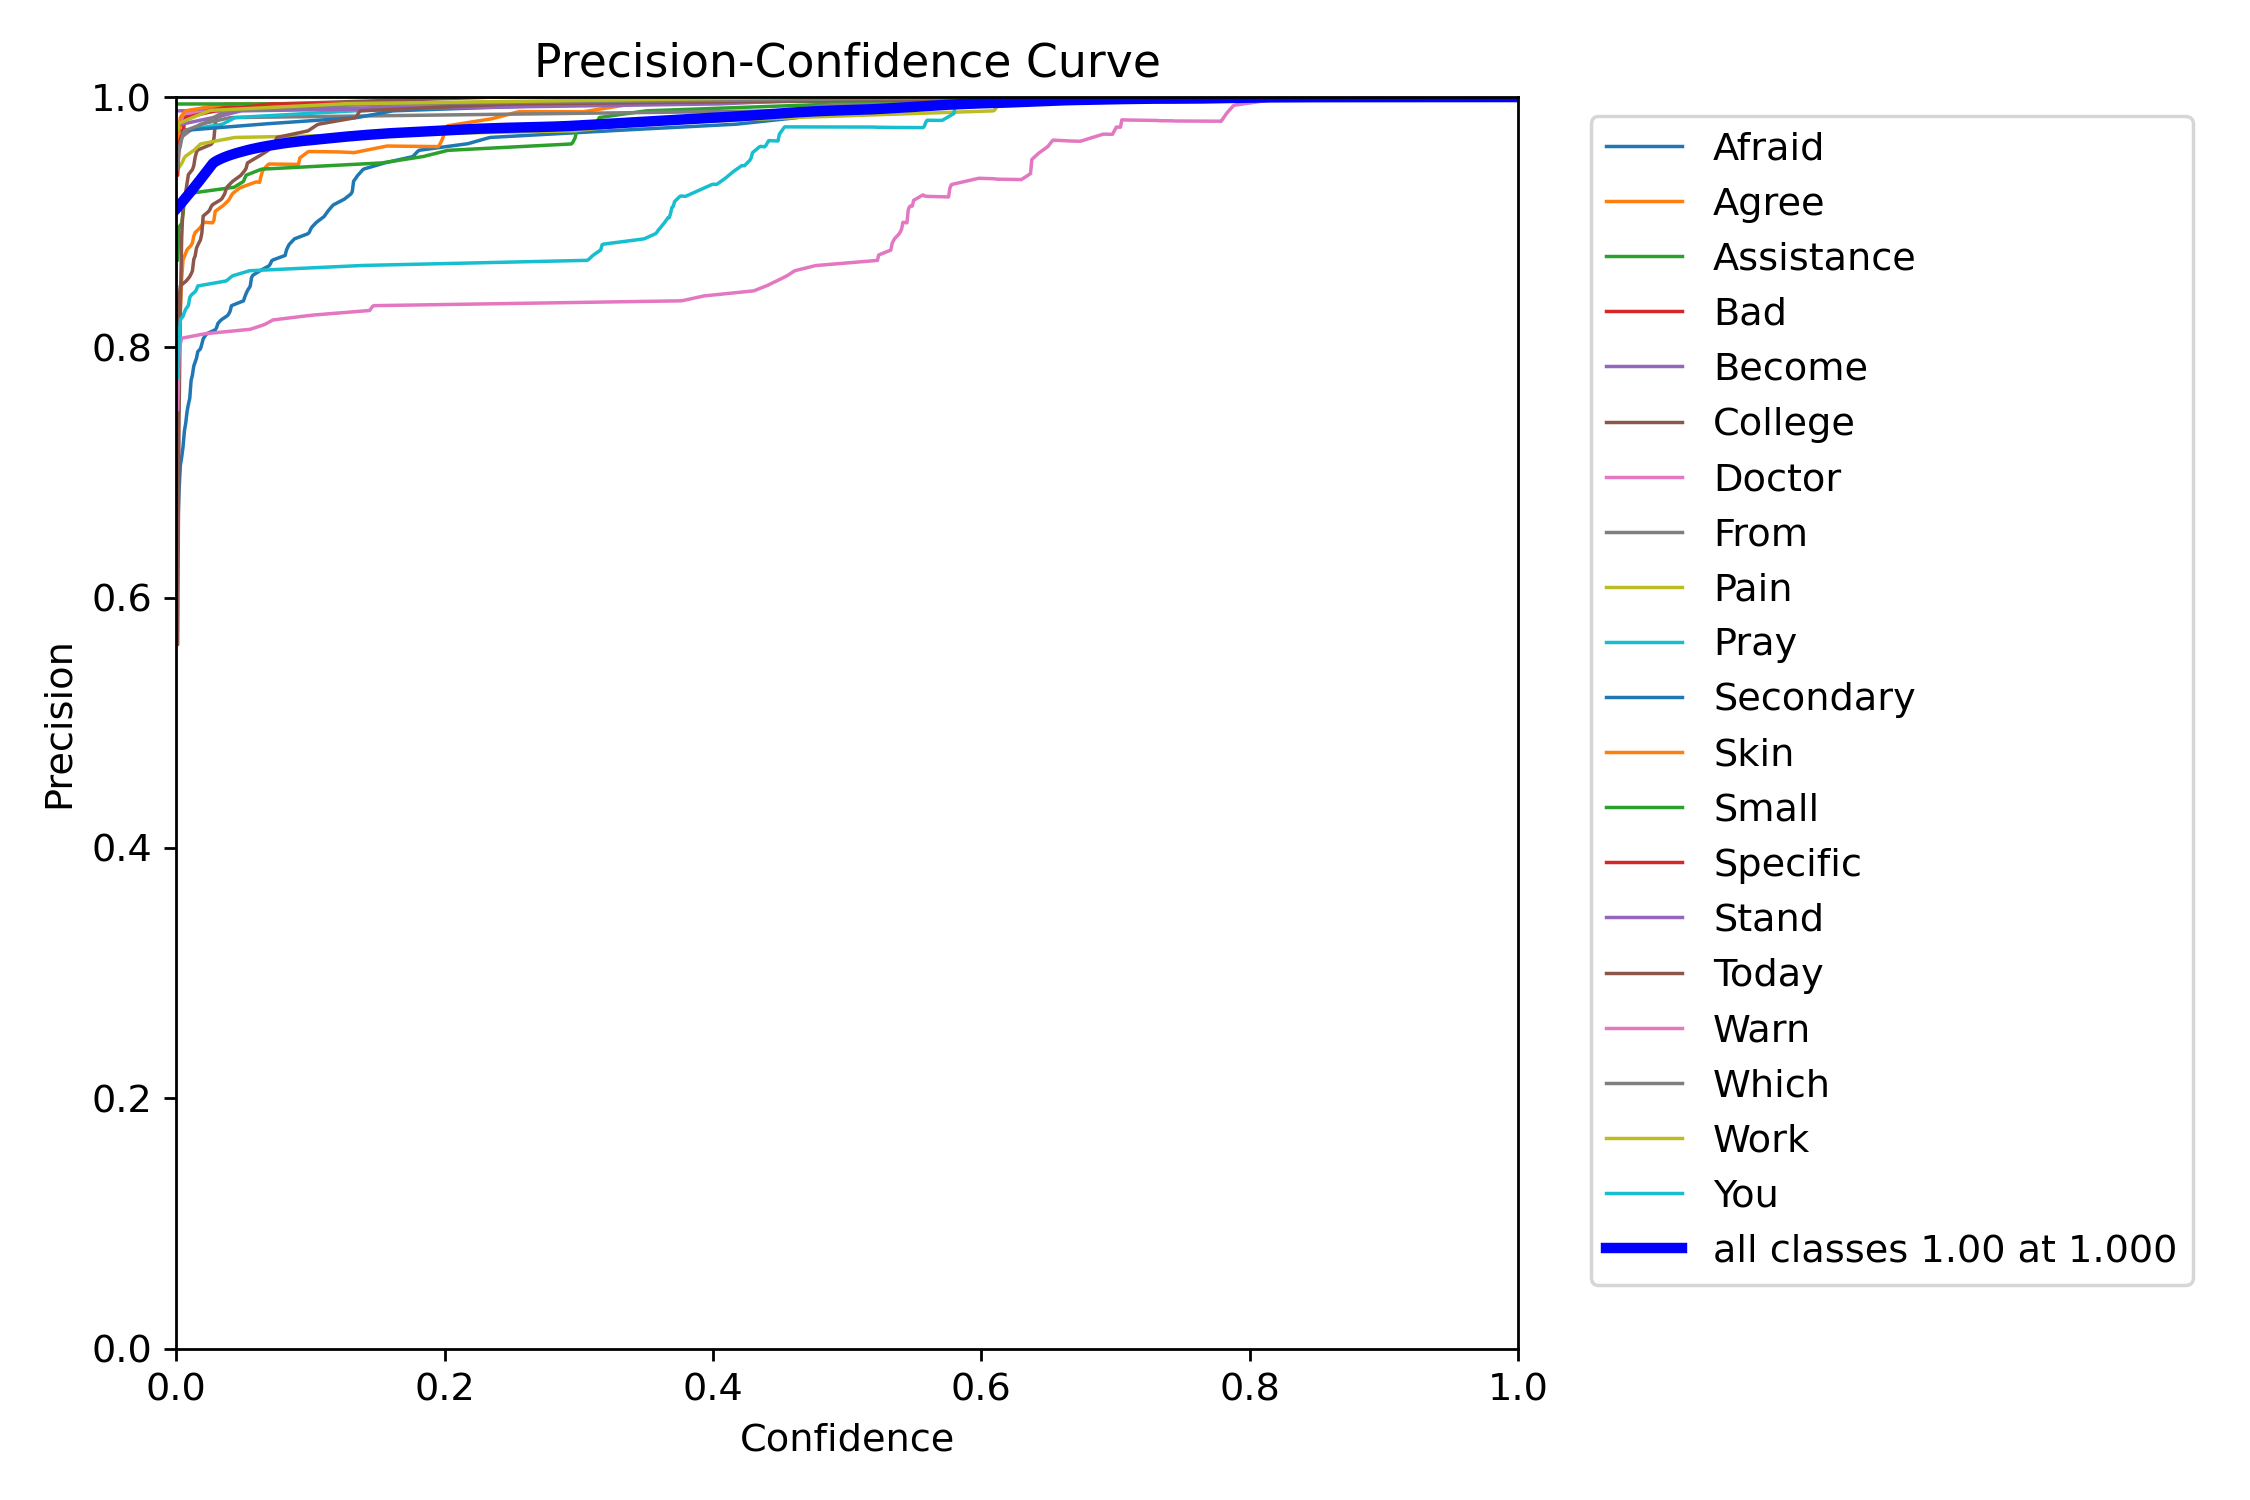

In [10]:
Image(f"{results_dir}/P_curve.png")

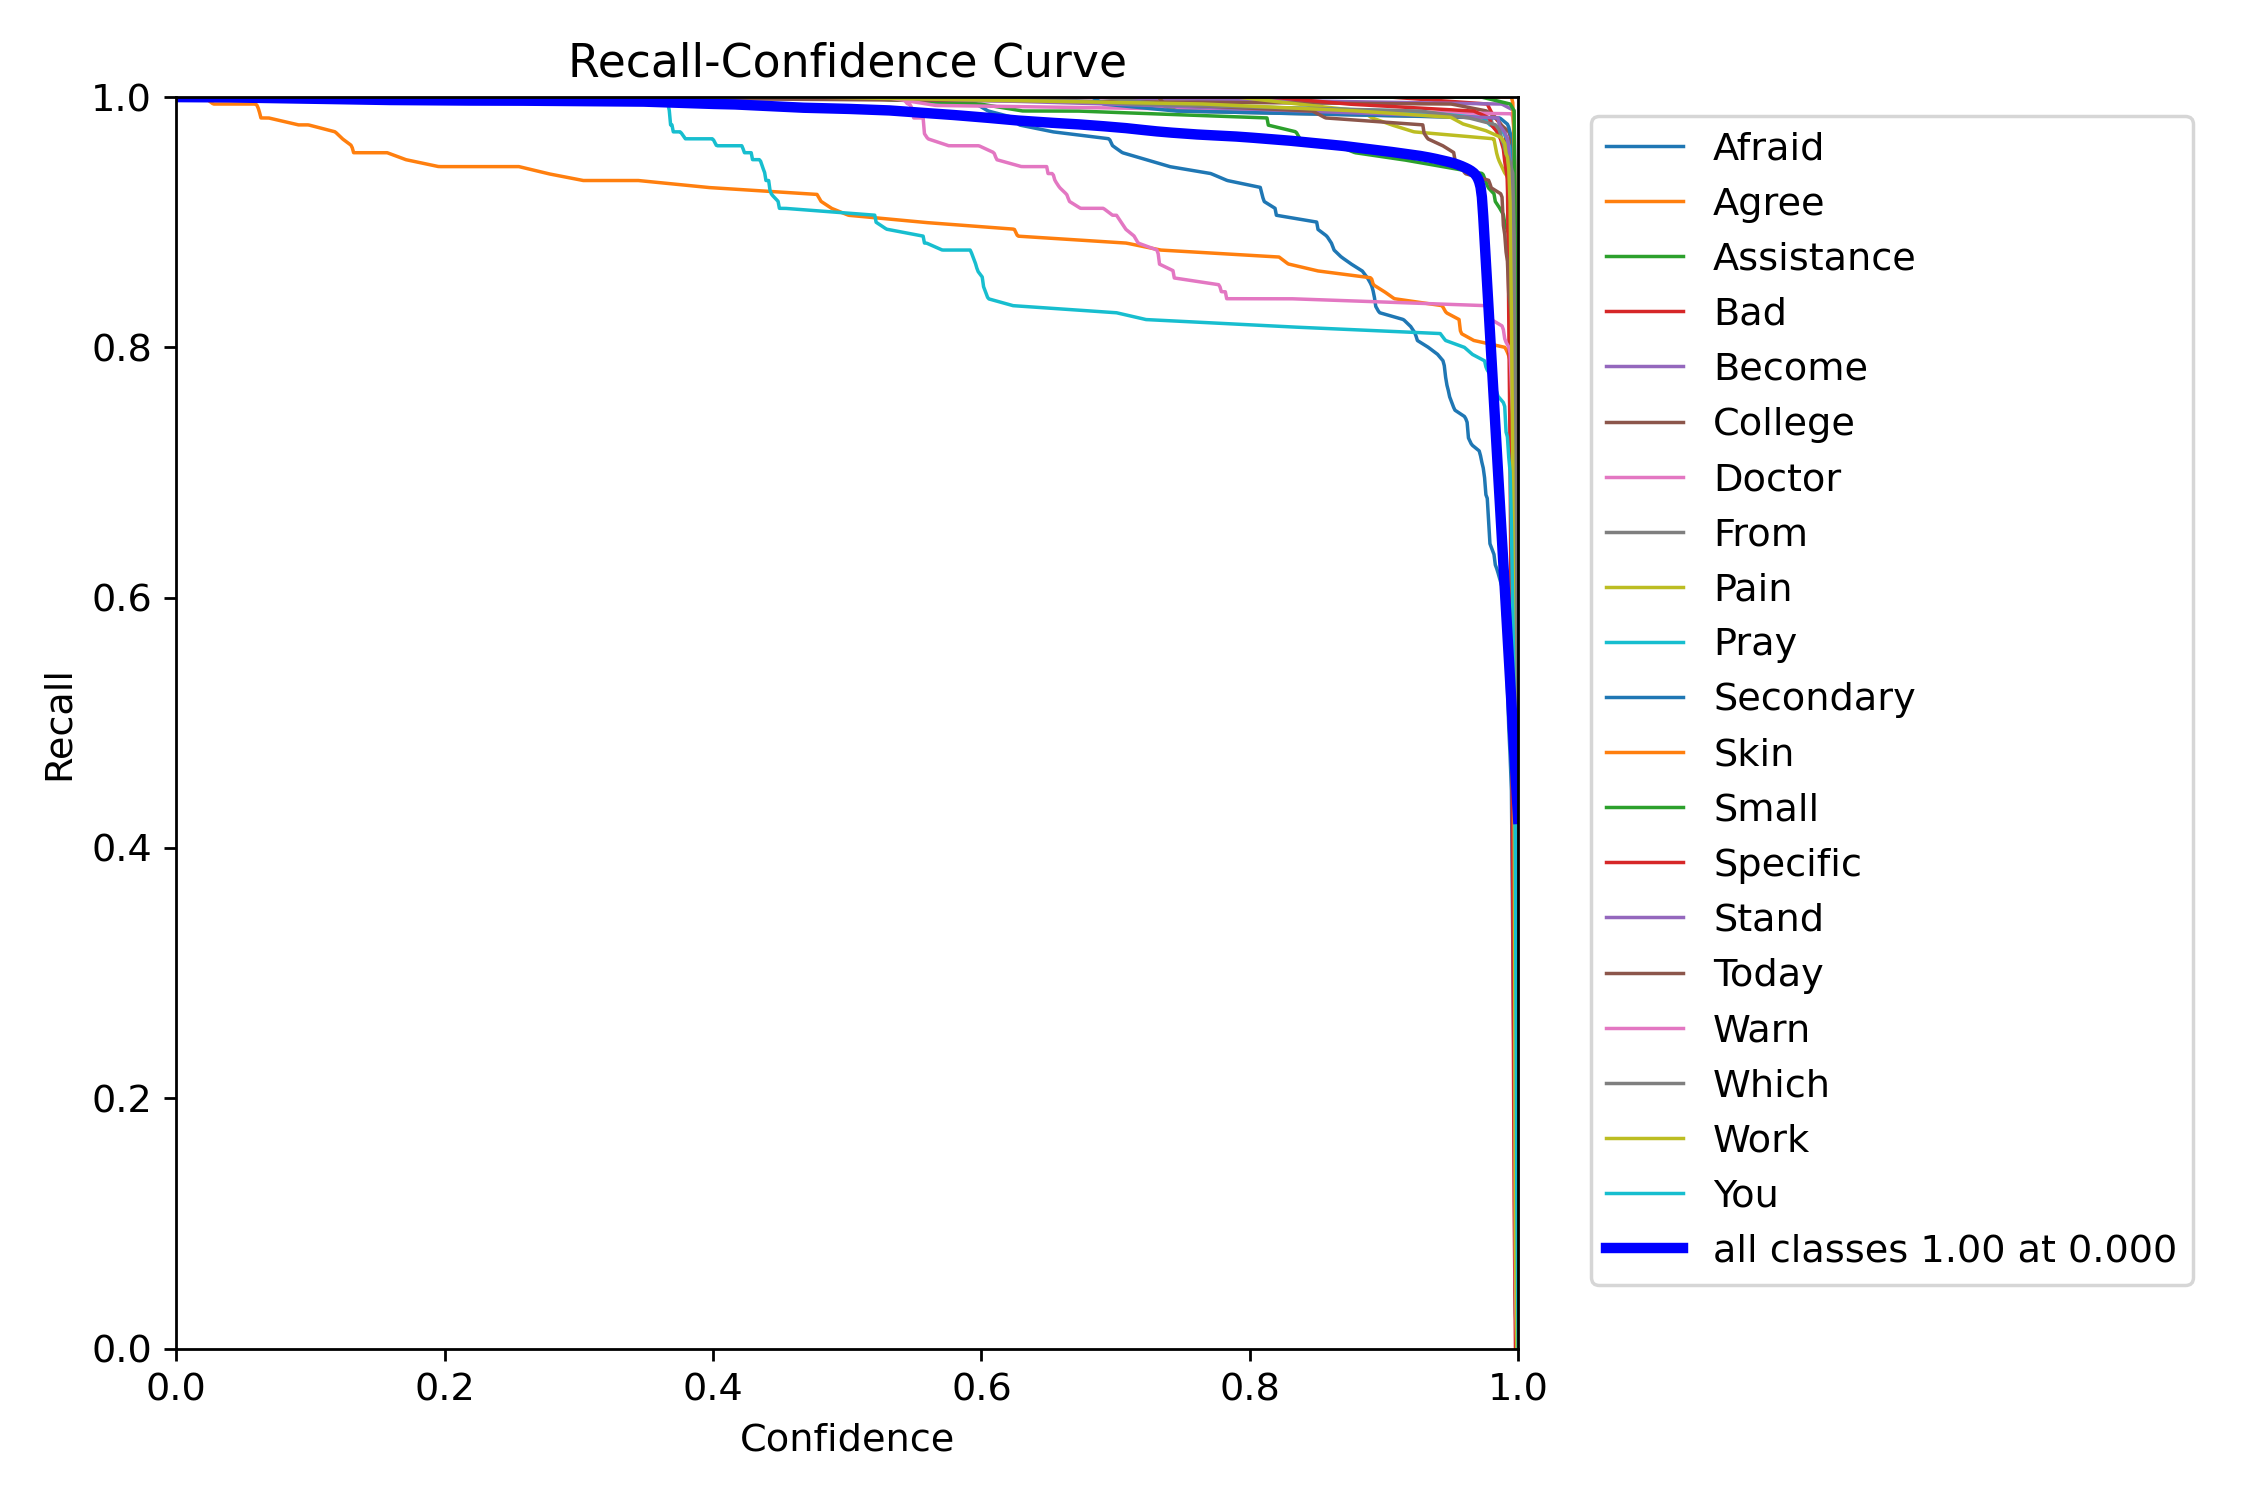

In [11]:
Image(f"{results_dir}/R_curve.png")

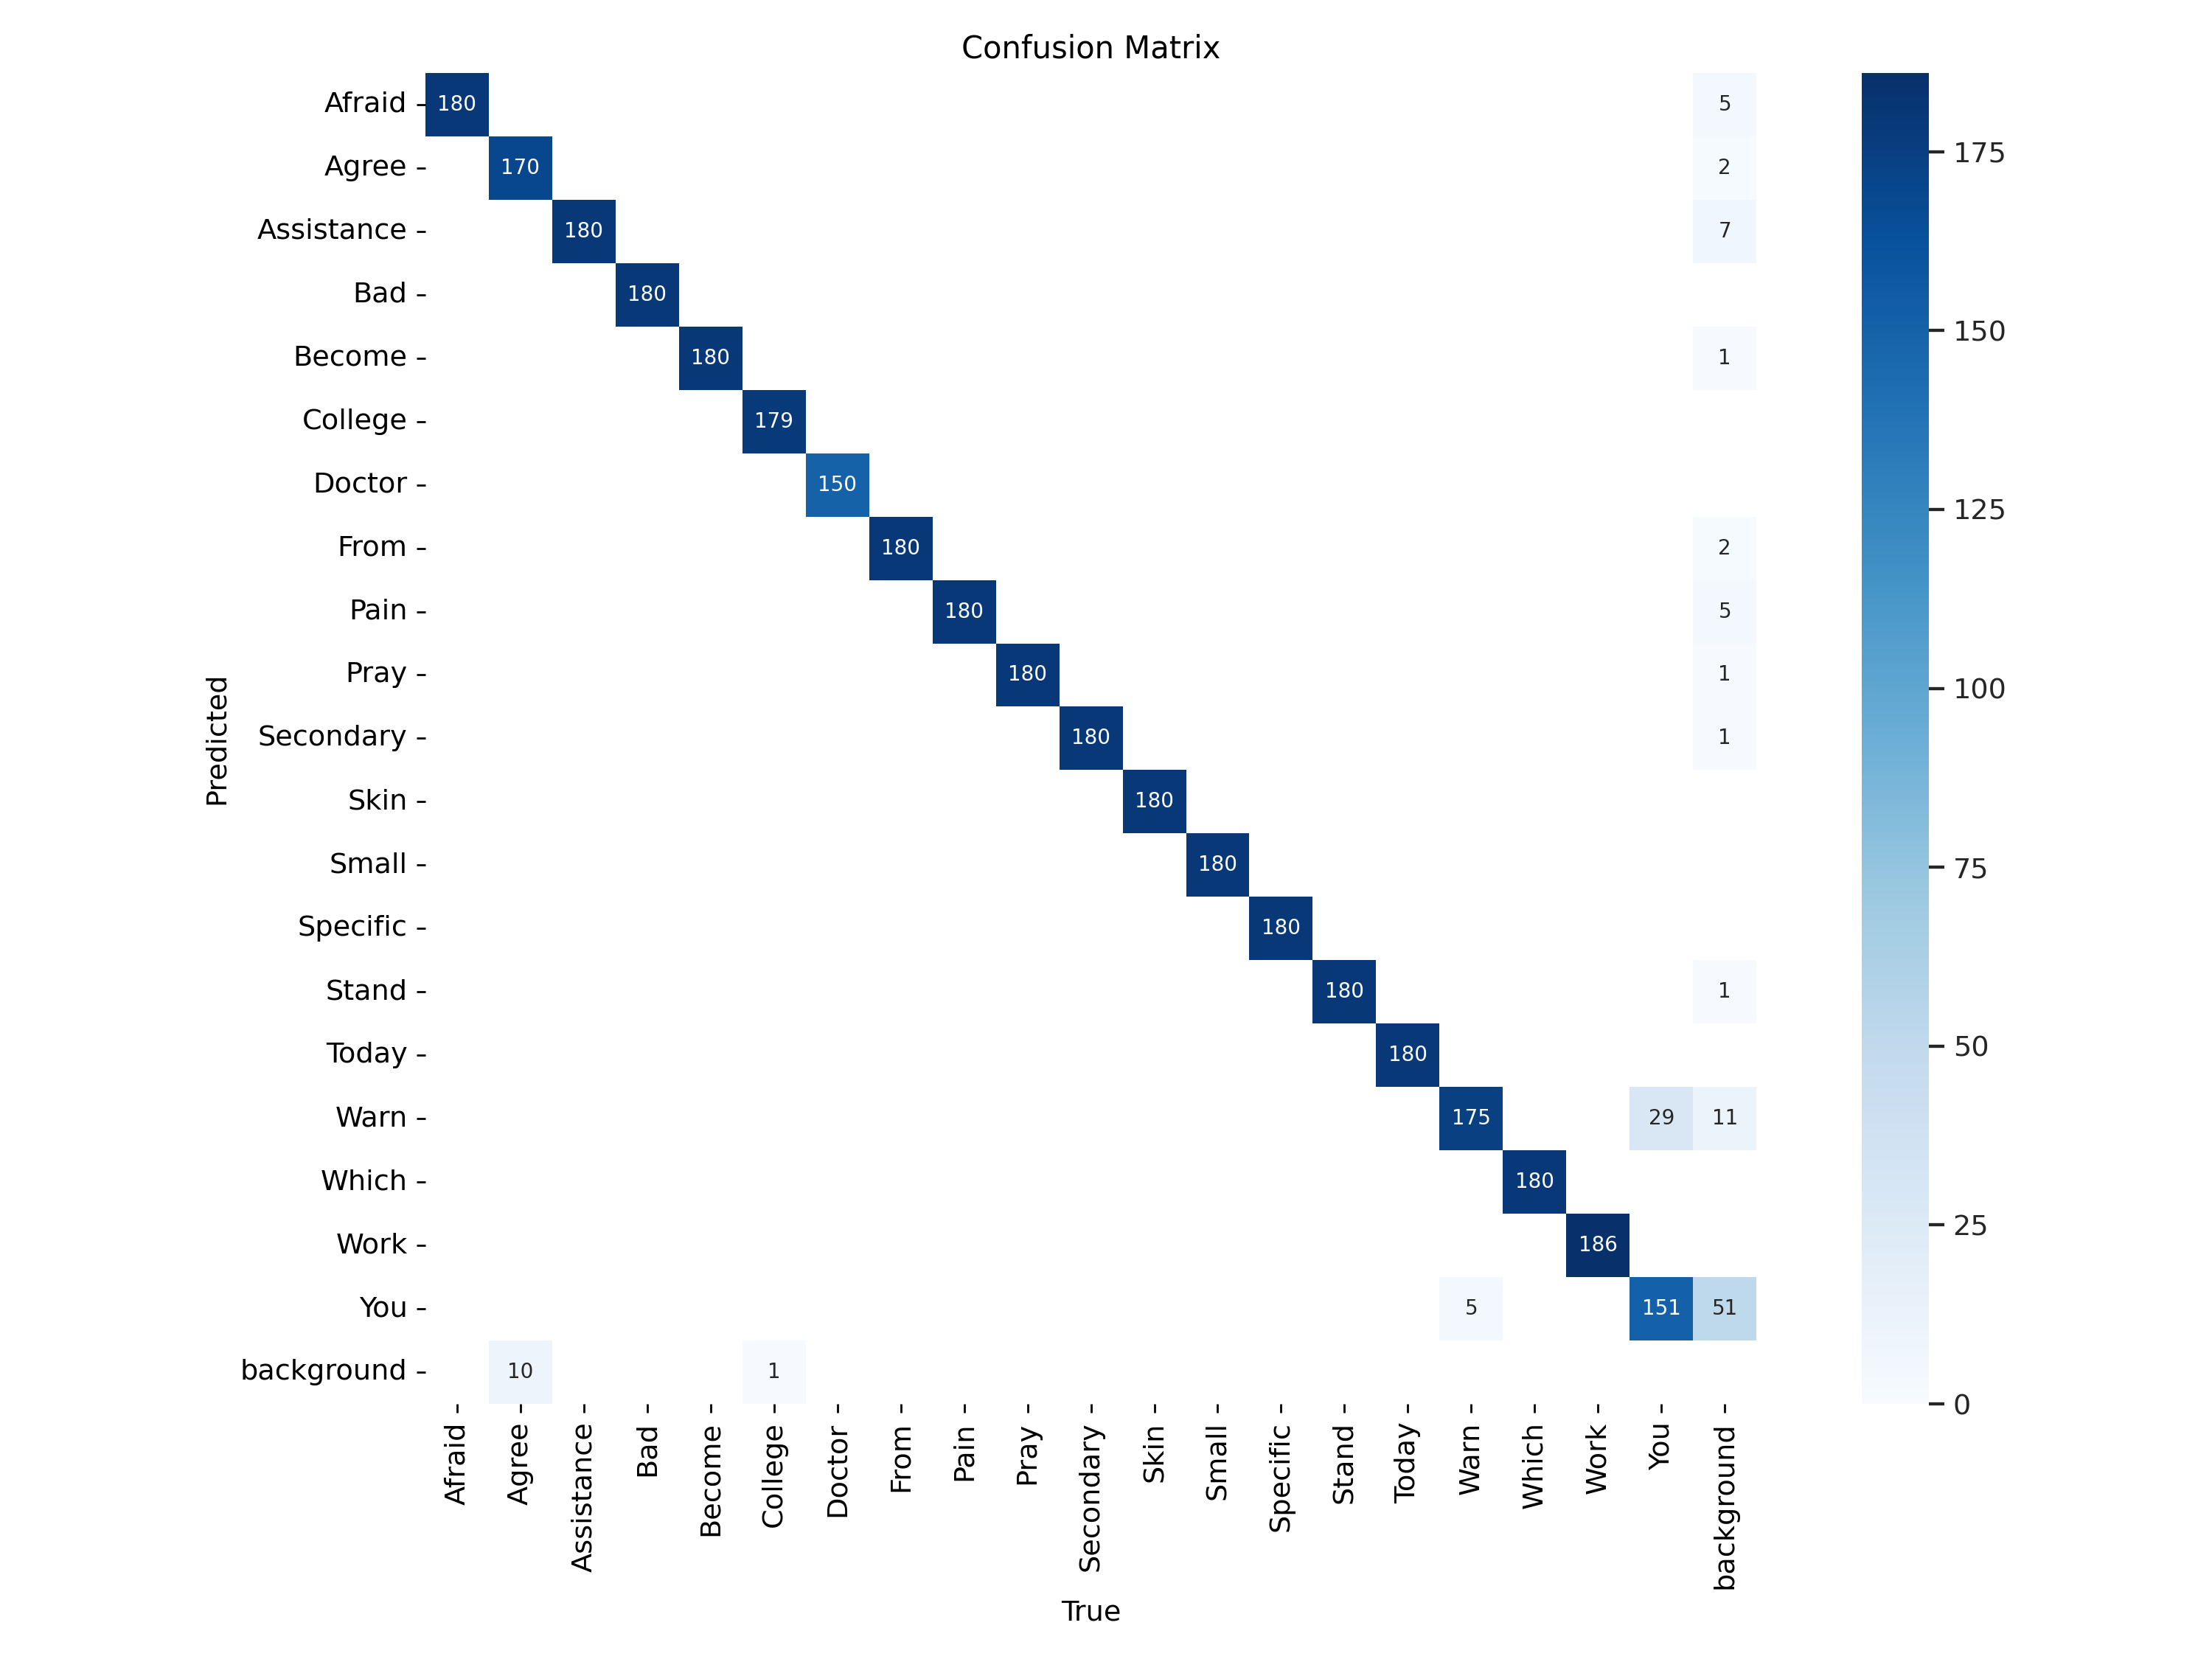

In [12]:
Image(f"{results_dir}/confusion_matrix.png")

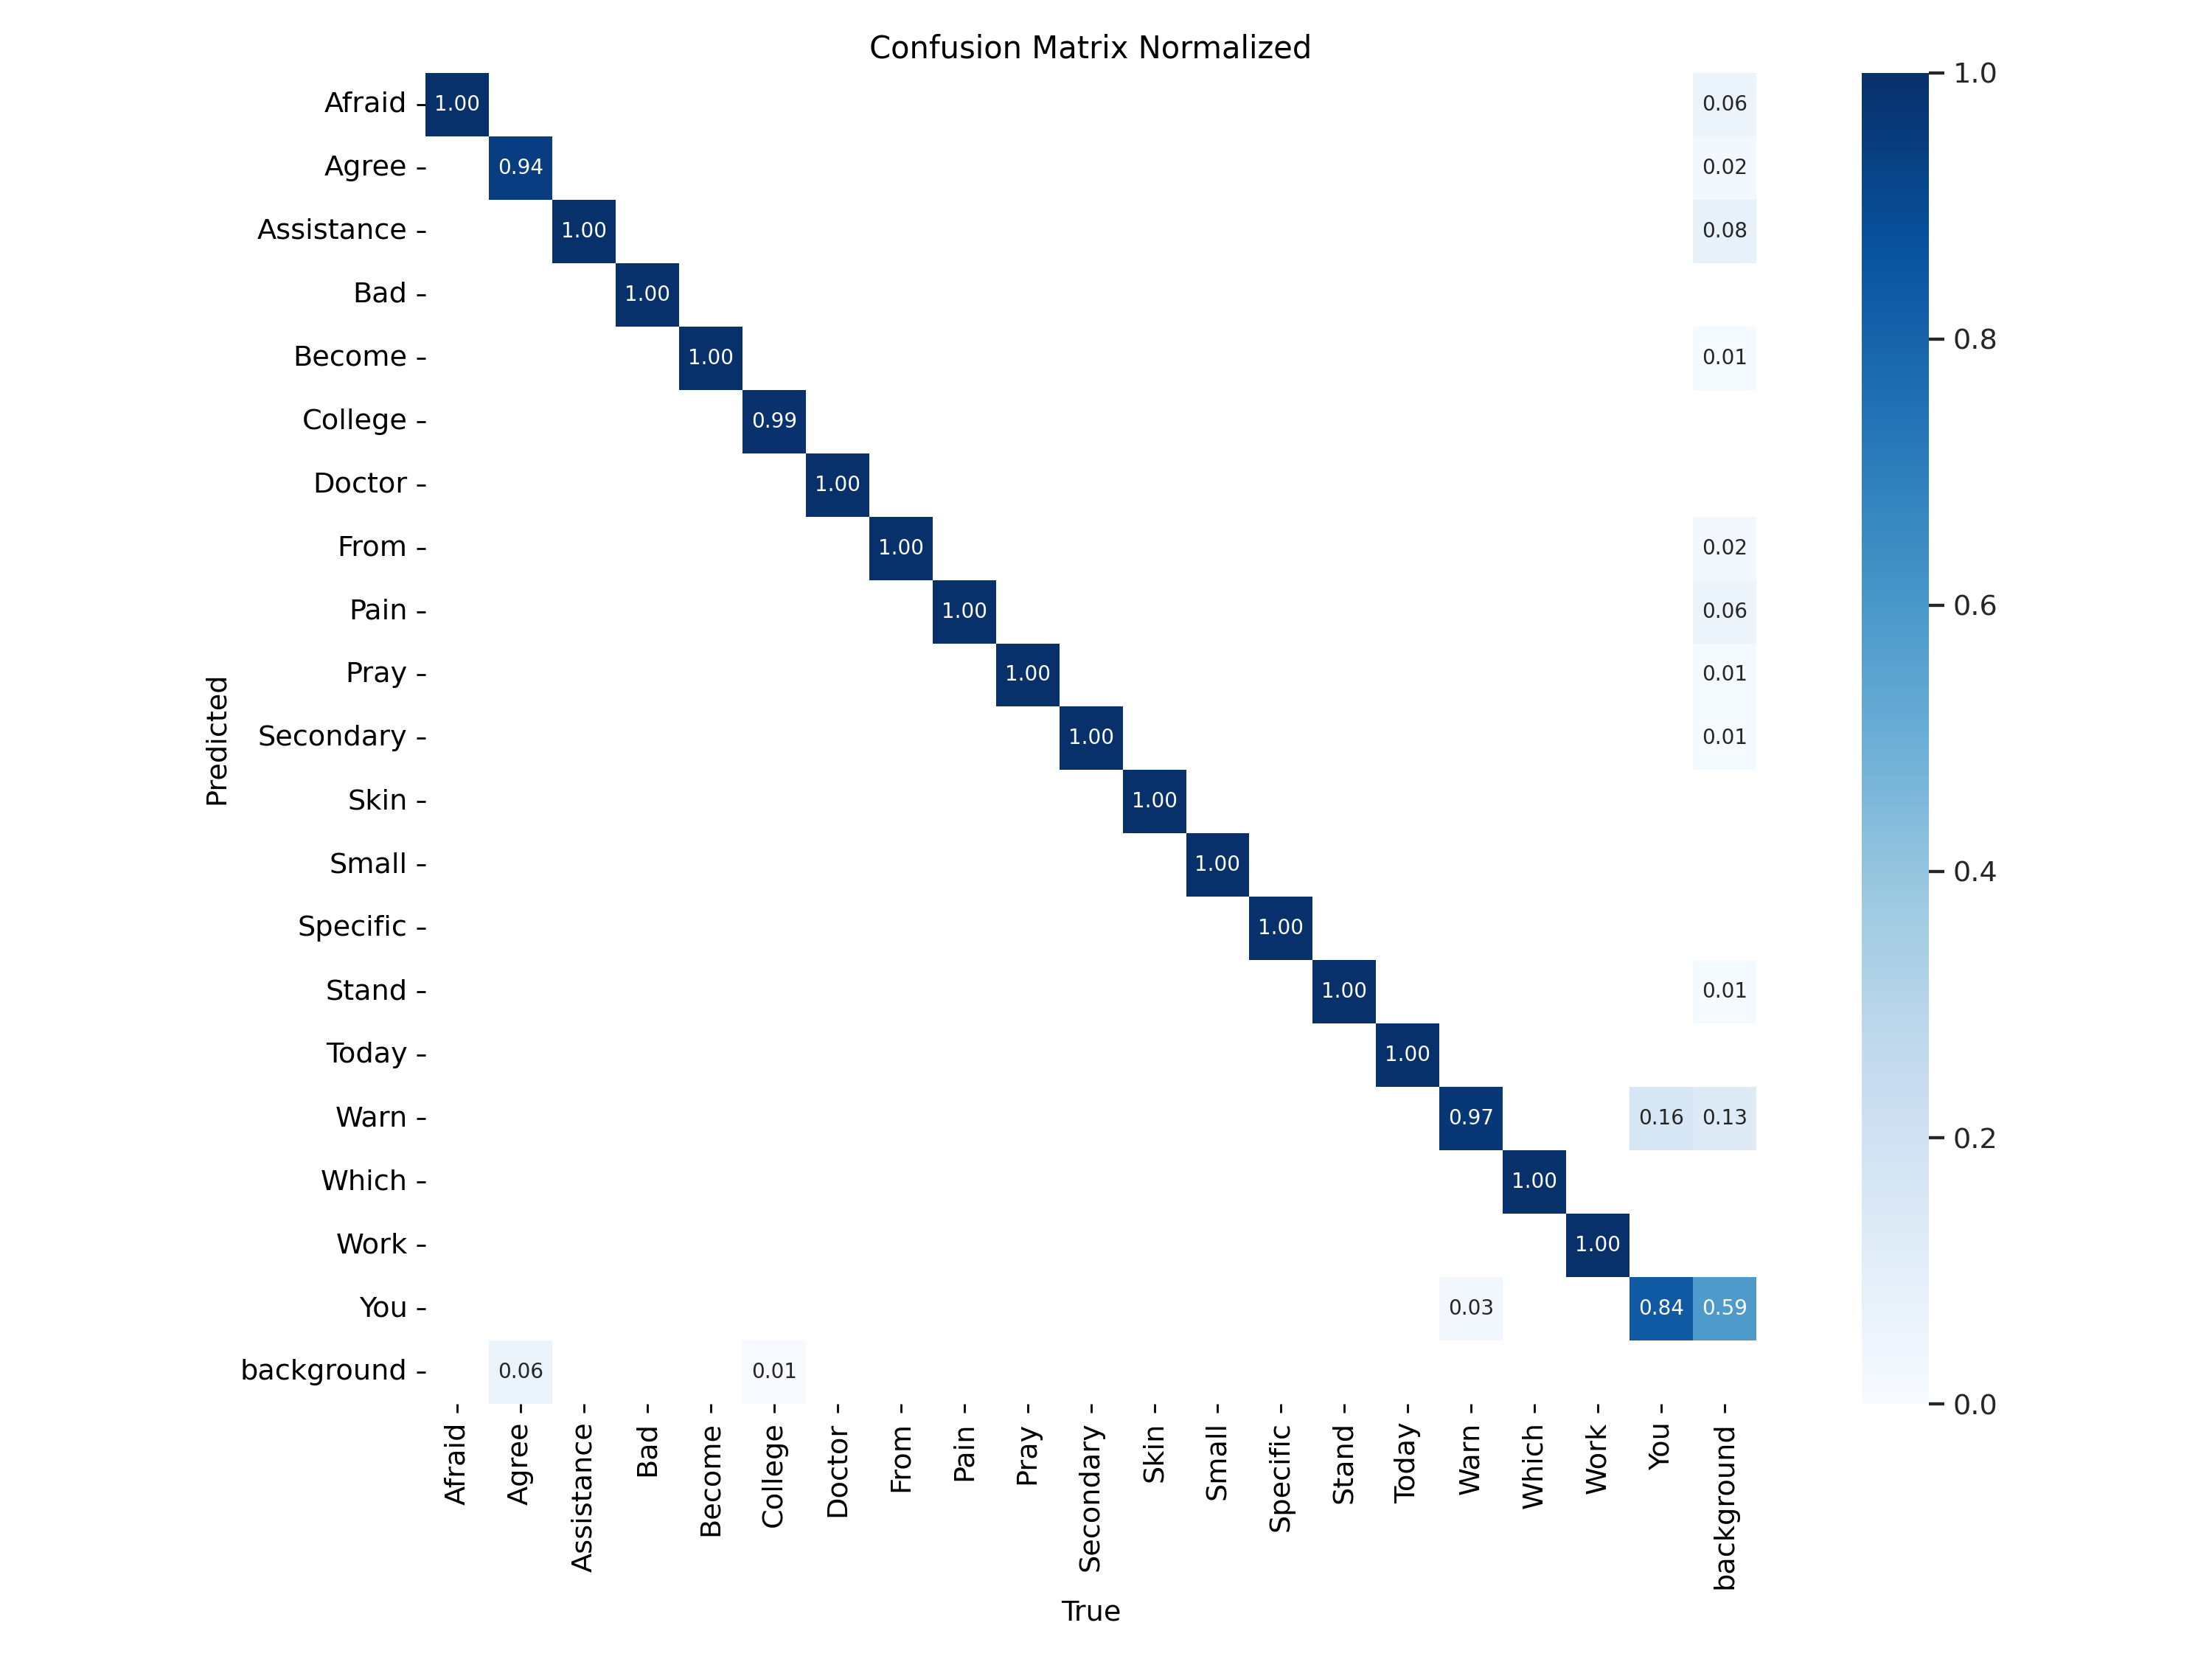

In [13]:
Image(f"{results_dir}/confusion_matrix_normalized.png")

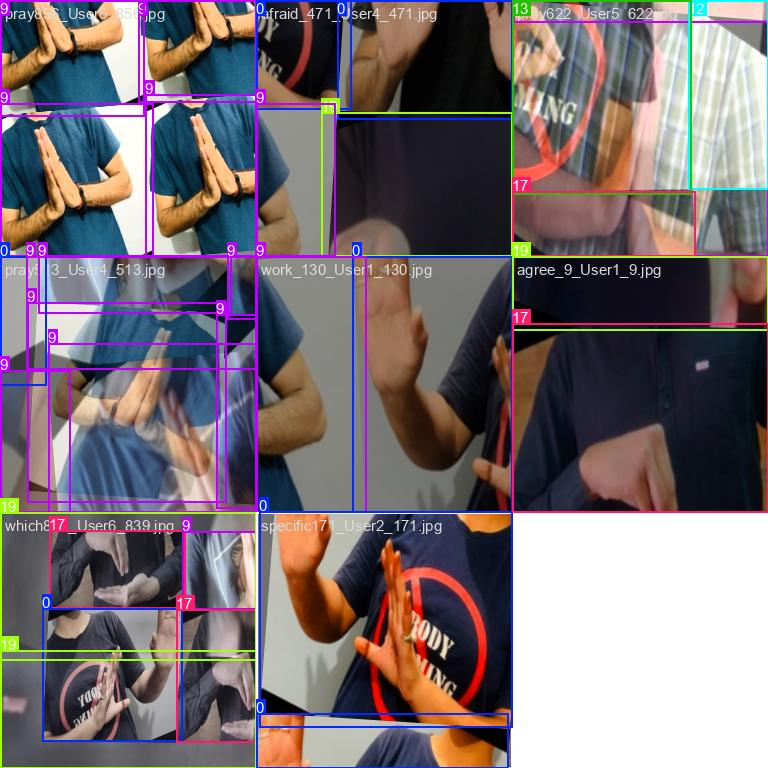

In [14]:
Image(f"{results_dir}/train_batch0.jpg")


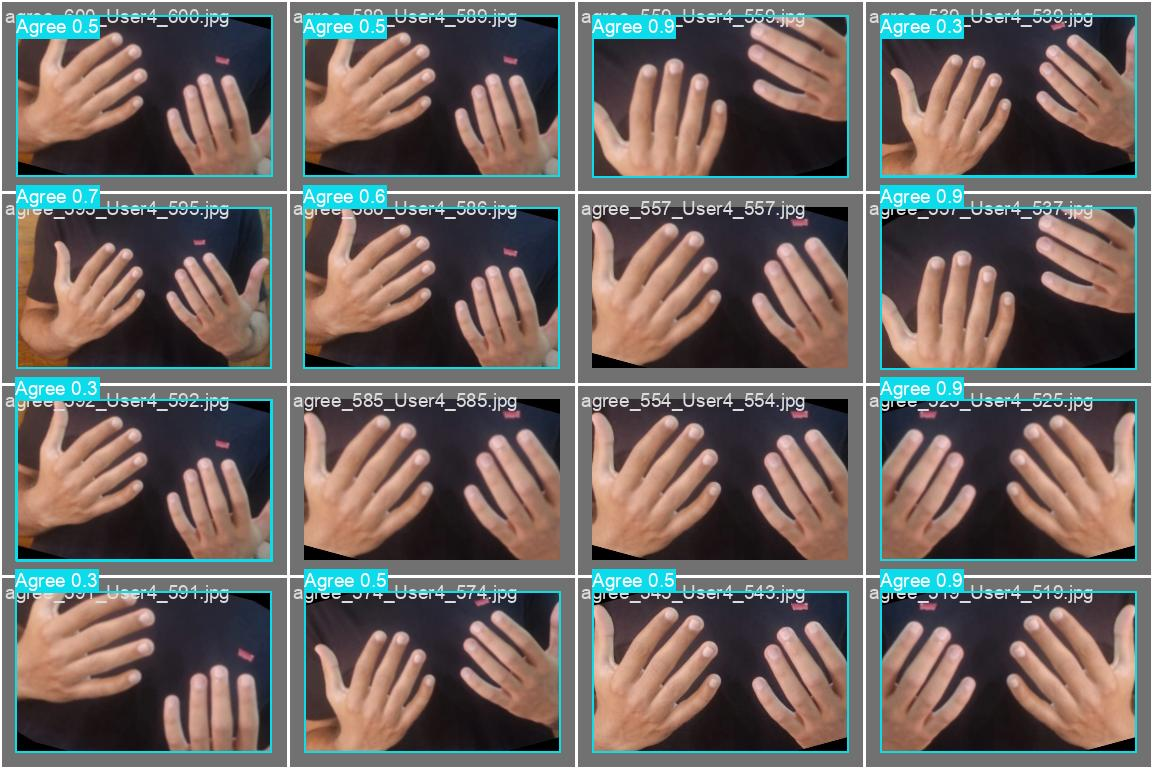

In [16]:
Image(f"{results_dir}/val_batch1_pred.jpg")

#**Step 09: Inference on Image**

In [29]:
%cd yolov10

[Errno 2] No such file or directory: 'yolov10'
/content/yolov10


In [17]:
!yolo task=detect mode=predict conf=0.70 save=True model='/content/yolov10/runs/detect/train/weights/best.pt' source='/content/ISL-Detection/Data_20/images/test'

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16,473,544 parameters, 0 gradients, 63.5 GFLOPs

image 1/45 /content/ISL-Detection/Data_20/images/test/Image 1.jpeg: 256x256 (no detections), 23.2ms
image 2/45 /content/ISL-Detection/Data_20/images/test/Image 10.jpeg: 256x256 1 Pain, 21.6ms
image 3/45 /content/ISL-Detection/Data_20/images/test/Image 11.jpeg: 256x256 1 Pain, 18.6ms
image 4/45 /content/ISL-Detection/Data_20/images/test/Image 12.jpeg: 256x256 1 From, 18.9ms
image 5/45 /content/ISL-Detection/Data_20/images/test/Image 13.jpeg: 256x256 1 From, 18.8ms
image 6/45 /content/ISL-Detection/Data_20/images/test/Image 14.jpeg: 256x256 1 From, 18.8ms
image 7/45 /content/ISL-Detection/Data_20/images/test/Image 15.jpg: 256x256 1 Warn, 18.7ms
image 8/45 /content/ISL-Detection/Data_20/images/test/Image 16.jpg: 256x256 1 Afraid, 18.2ms
image 9/45 /content/ISL-Detection/Data_20/images/test/Image 17.jpg: 256x256 1 Afra

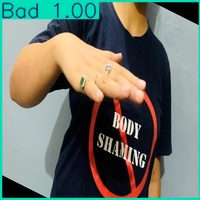

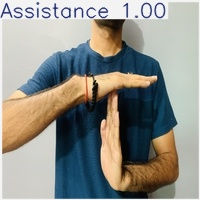

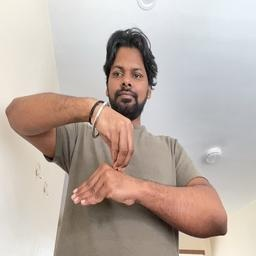

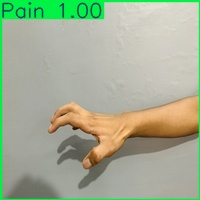

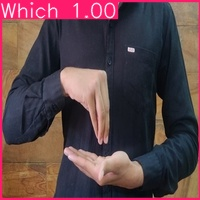

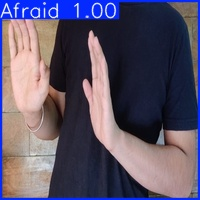

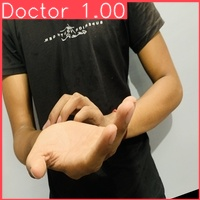

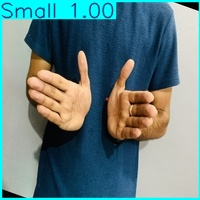

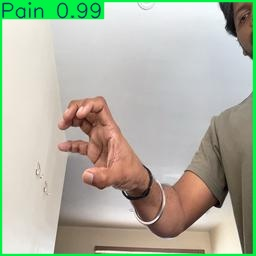

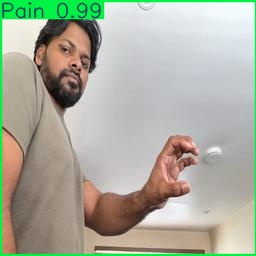

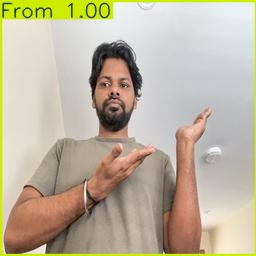

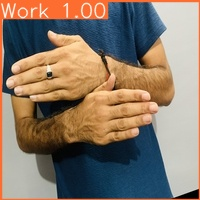

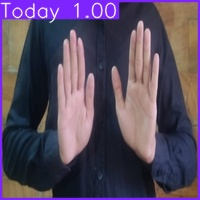

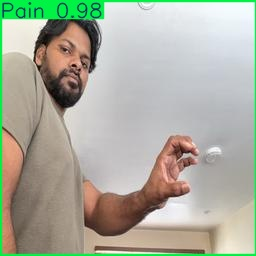

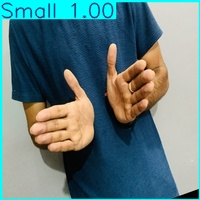

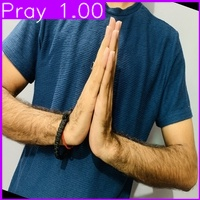

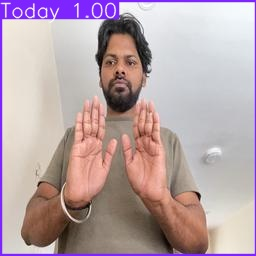

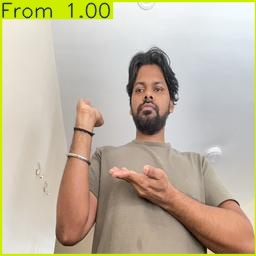

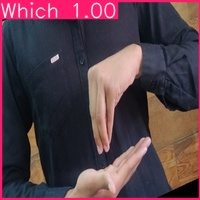

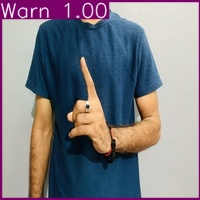

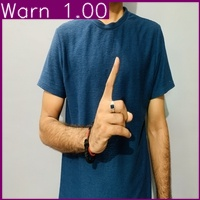

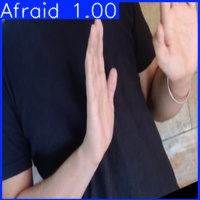

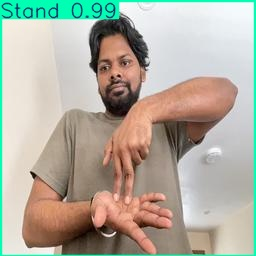

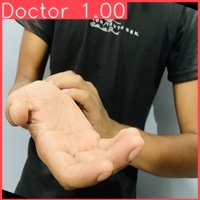

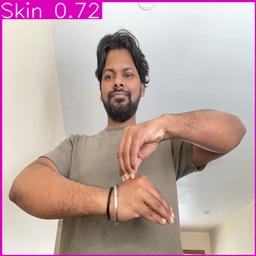

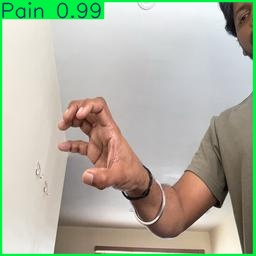

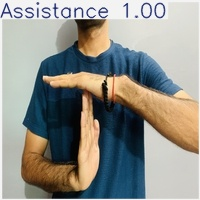

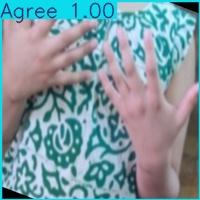

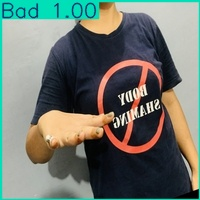

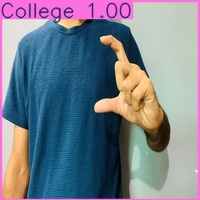

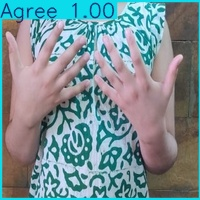

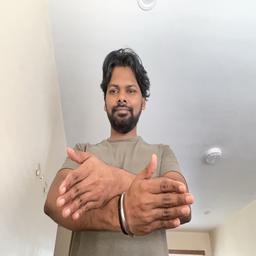

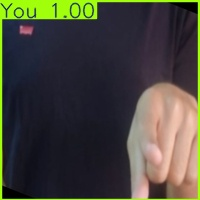

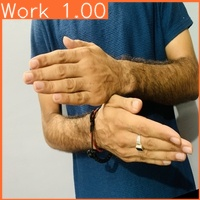

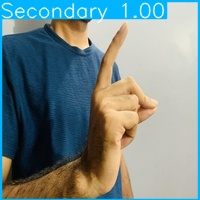

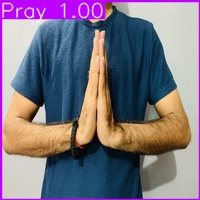

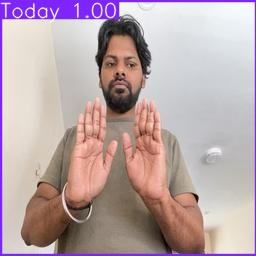

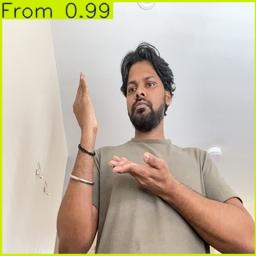

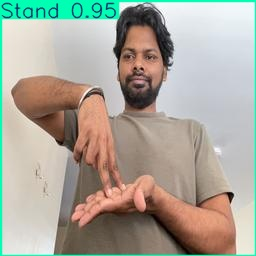

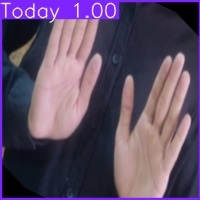

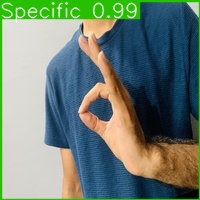

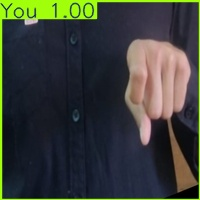

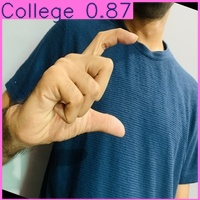

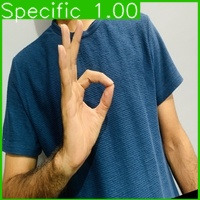

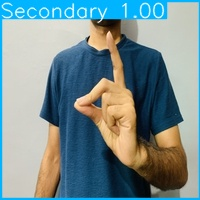

In [18]:
import os
from IPython.display import Image, display

# Specify the directory containing images
directory_path = '/content/yolov10/runs/detect/predict/'

# List all image files in the directory
image_files = [f for f in os.listdir(directory_path) if f.endswith(('png', 'jpg', 'jpeg'))]

# Display each image
for image_file in image_files:
    image_path = os.path.join(directory_path, image_file)
    display(Image(filename=image_path))


#**Step 10: Display Metrics**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

res_path = f"{results_dir}/results.csv"
# Load the CSV file into a DataFrame
df = pd.read_csv(res_path)

# Remove spaces from column names
df.columns = df.columns.str.strip()

# Display the first few rows
#print(df.dtypes)
print(df.head())

   epoch  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1         0.82710          4.0434          2.1546   
1      2         0.72718          3.3010          2.0669   
2      3         0.64604          2.9504          2.0167   
3      4         0.58820          2.6826          1.9840   
4      5         0.53165          2.4336          1.9575   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.58522            0.47144           0.52680   
1               0.61098            0.64522           0.69984   
2               0.78675            0.80400           0.91132   
3               0.88801            0.88032           0.96100   
4               0.93442            0.94426           0.98428   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.48493       0.59278       3.17820        2.3297  0.080211   
1              0.69794       0.41244       2.95030        2.2156  0.060410   
2              0.903

## Plot Training and Validation Loss curves

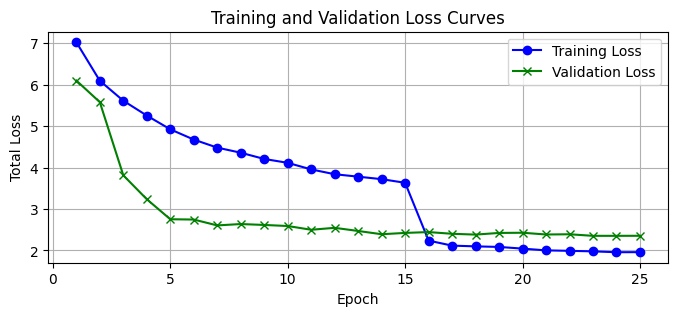

In [20]:
import matplotlib.pyplot as plt

# Calculate total training and validation loss
df['Total_Train_Loss'] = df['train/box_loss'] + df['train/dfl_loss'] + df['train/cls_loss']
df['Total_Val_Loss'] = df['val/box_loss'] + df['val/dfl_loss'] + df['val/cls_loss']

# Plot training and validation loss curves
plt.figure(figsize=(8, 3))
plt.plot(df['epoch'], df['Total_Train_Loss'], label='Training Loss', color='blue', marker='o')
plt.plot(df['epoch'], df['Total_Val_Loss'], label='Validation Loss', color='green', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

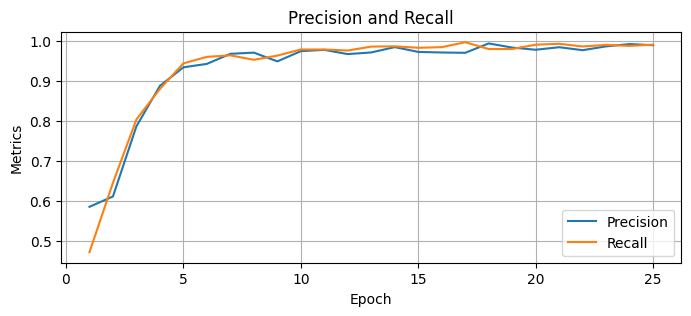

In [21]:
# Plot precision and  recall
plt.figure(figsize=(8, 3))
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.title('Precision and Recall')
plt.legend()
plt.grid(True)
plt.show()

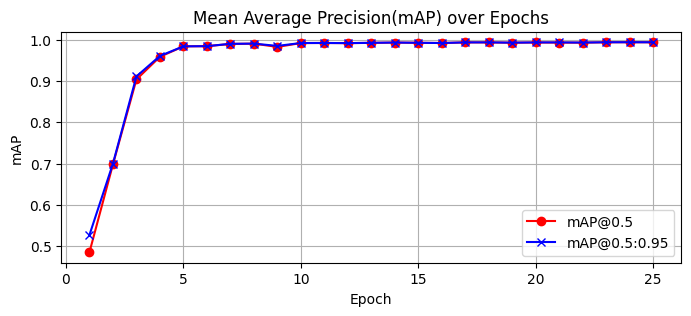

In [22]:
#plot Mean average precision accuracy

plt.figure(figsize=(8, 3))
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5', color='red', marker='o')
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5:0.95', color='blue', marker='x')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('Mean Average Precision(mAP) over Epochs')
plt.grid(True)
plt.legend()
plt.show()

#**Step 11: Comparison of model YOLOv10 and YOLOv5 Performance**

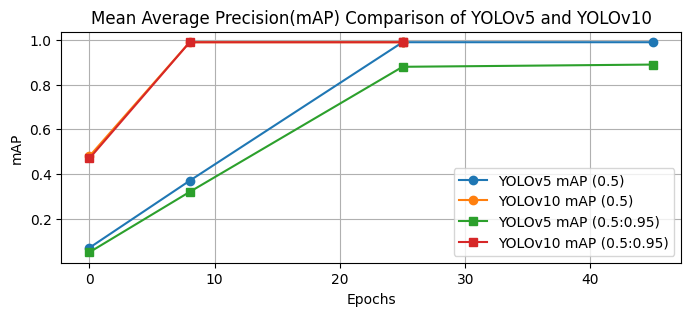

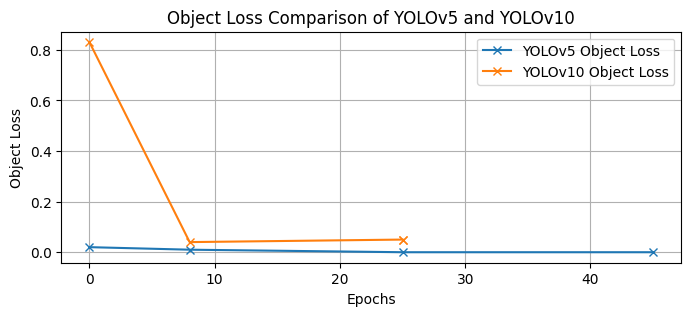

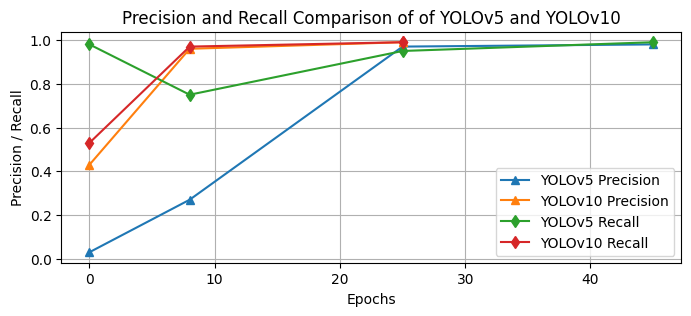

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Epochs': [0, 0, 8, 8, 25, 25, 45, 25],
    'Model': ['YOLOv5', 'YOLOv10', 'YOLOv5', 'YOLOv10', 'YOLOv5', 'YOLOv10', 'YOLOv5', 'YOLOv10'],
    'mAP (0.5)': [0.07, 0.48, 0.37, 0.99, 0.99, 0.99, 0.99, 0.99],
    'mAP (0.5:0.95)': [0.05, 0.47, 0.32, 0.99, 0.88, 0.99, 0.89, 0.99],
    'Precision': [0.03, 0.43, 0.27, 0.96, 0.97, 0.99, 0.98, 0.99],
    'Recall': [0.98, 0.53, 0.75, 0.97, 0.95, 0.99, 0.99, 0.99],
    'Object Loss': [0.02, 0.83, 0.01, 0.04, 0.00, 0.05, 0.00, 0.05]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plotting mAP
plt.figure(figsize=(8, 3))
plt.plot(df[df['Model'] == 'YOLOv5']['Epochs'], df[df['Model'] == 'YOLOv5']['mAP (0.5)'], marker='o', label='YOLOv5 mAP (0.5)')
plt.plot(df[df['Model'] == 'YOLOv10']['Epochs'], df[df['Model'] == 'YOLOv10']['mAP (0.5)'], marker='o', label='YOLOv10 mAP (0.5)')
plt.plot(df[df['Model'] == 'YOLOv5']['Epochs'], df[df['Model'] == 'YOLOv5']['mAP (0.5:0.95)'], marker='s', label='YOLOv5 mAP (0.5:0.95)')
plt.plot(df[df['Model'] == 'YOLOv10']['Epochs'], df[df['Model'] == 'YOLOv10']['mAP (0.5:0.95)'], marker='s', label='YOLOv10 mAP (0.5:0.95)')
plt.title('Mean Average Precision(mAP) Comparison of YOLOv5 and YOLOv10')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Object Loss
plt.figure(figsize=(8, 3))
plt.plot(df[df['Model'] == 'YOLOv5']['Epochs'], df[df['Model'] == 'YOLOv5']['Object Loss'], marker='x', label='YOLOv5 Object Loss')
plt.plot(df[df['Model'] == 'YOLOv10']['Epochs'], df[df['Model'] == 'YOLOv10']['Object Loss'], marker='x', label='YOLOv10 Object Loss')
plt.title('Object Loss Comparison of YOLOv5 and YOLOv10')
plt.xlabel('Epochs')
plt.ylabel('Object Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Precision and Recall
plt.figure(figsize=(8, 3))
plt.plot(df[df['Model'] == 'YOLOv5']['Epochs'], df[df['Model'] == 'YOLOv5']['Precision'], marker='^', label='YOLOv5 Precision')
plt.plot(df[df['Model'] == 'YOLOv10']['Epochs'], df[df['Model'] == 'YOLOv10']['Precision'], marker='^', label='YOLOv10 Precision')
plt.plot(df[df['Model'] == 'YOLOv5']['Epochs'], df[df['Model'] == 'YOLOv5']['Recall'], marker='d', label='YOLOv5 Recall')
plt.plot(df[df['Model'] == 'YOLOv10']['Epochs'], df[df['Model'] == 'YOLOv10']['Recall'], marker='d', label='YOLOv10 Recall')
plt.title('Precision and Recall Comparison of of YOLOv5 and YOLOv10')
plt.xlabel('Epochs')
plt.ylabel('Precision / Recall')
plt.legend()
plt.grid(True)
plt.show()
